In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras import metrics
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print('Training images shape: ' + str(train_images.shape))
print('Training targets shape: ' + str(train_targets.shape))
print('Targets: ' + str(train_targets))

Training images shape: (60000, 28, 28)
Training targets shape: (60000,)
Targets: [5 0 4 ... 5 6 8]


In [3]:
# Plot the first 10 digits
def digits_plotter(n_digits):

    # Temporary hide Seaborn grid lines
    with sns.axes_style('white'):
        plt.figure(figsize=(12, 6))
        for i in range(n_digits):
            digit = test_images[i]
            fig = plt.subplot(2, 5, i + 1)
            plt.imshow(digit, cmap=plt.cm.binary)

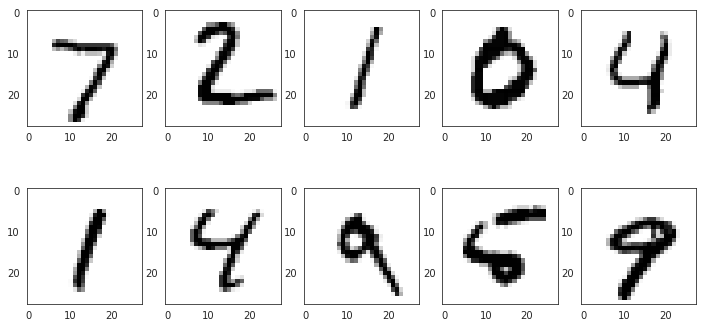

In [4]:
digits_plotter(10)

In [5]:
# Reshape images data into a (number of samples, 28x28) matrix
x_train = train_images.reshape((60000, 28 * 28))
x_test = test_images.reshape((10000, 28 * 28))

# Change pixel values from (0, 255) to (0, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding of expected results
y_train = to_categorical(train_targets).astype('int')
y_test = to_categorical(test_targets).astype('int')

print('Encoded targets shape: ' + str(y_train.shape))

# Show a sample of encoded input
df = pd.DataFrame(y_train)
df.sample(n=10)

Encoded targets shape: (60000, 10)


,0,1,2,3,4,5,6,7,8,9
31300,0,0,0,0,0,0,0,1,0,0
40273,0,1,0,0,0,0,0,0,0,0
14891,0,0,0,0,0,0,0,1,0,0
16743,0,0,0,1,0,0,0,0,0,0
36919,1,0,0,0,0,0,0,0,0,0
44075,0,0,0,0,0,0,0,0,0,1
37941,0,0,1,0,0,0,0,0,0,0
39268,0,1,0,0,0,0,0,0,0,0
21430,0,0,0,0,1,0,0,0,0,0
12161,0,0,1,0,0,0,0,0,0,0


In [6]:
# Create a (784, 512, 256, 10) model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax')) 
# If the last line above doesn't work, try the following
#model.add(Dense(10))
#model.add(Activation(tf.nn.softmax))

# Describe the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = categorical_crossentropy, 
              optimizer = 'adam',
              metrics = [metrics.categorical_accuracy])

# If the compilation doesn't work, try 
# import keras.backend as K
# def get_categorical_accuracy_keras(y_true, y_pred):
#    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))

# model.compile(loss=categorical_crossentropy, 
#               optimizer='adam', 
#               metrics=[get_categorical_accuracy_keras])

In [8]:
history = model.fit(x_train,
                    y_train,
                    validation_split = 0.1,
                    epochs = 20, 
                    batch_size = 512)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 84us/step - loss: 0.3958 - categorical_accuracy: 0.8883 - val_loss: 0.1471 - val_categorical_accuracy: 0.9588
Epoch 2/20
54000/54000 [==============================] - 4s 77us/step - loss: 0.1425 - categorical_accuracy: 0.9589 - val_loss: 0.0931 - val_categorical_accuracy: 0.9723
Epoch 3/20
54000/54000 [==============================] - 4s 72us/step - loss: 0.0916 - categorical_accuracy: 0.9729 - val_loss: 0.0806 - val_categorical_accuracy: 0.9765
Epoch 4/20
54000/54000 [==============================] - 4s 73us/step - loss: 0.0646 - categorical_accuracy: 0.9807 - val_loss: 0.0700 - val_categorical_accuracy: 0.9785
Epoch 5/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.0460 - categorical_accuracy: 0.9863 - val_loss: 0.0667 - val_categorical_accuracy: 0.9803
Epoch 6/20
54000/54000 [==============================] - 4s 65us/step - loss: 0.0358 - categori

In [9]:
history.history

{'val_loss': [0.14709102543195088,
  0.09306045150756836,
  0.08061825533707936,
  0.06999632708231608,
  0.0667463579972585,
  0.06306697960694631,
  0.06751054028669994,
  0.06579413795471191,
  0.05774284374713898,
  0.06634528728326161,
  0.06814464314778645,
  0.07254594516754151,
  0.06617093225320181,
  0.06863689323266348,
  0.06783214763800303,
  0.0691134182214737,
  0.0742843500773112,
  0.07685688789685567,
  0.07475417892138163,
  0.07565996090571085],
 'val_categorical_accuracy': [0.9588333338101704,
  0.9723333338101705,
  0.9765000004768372,
  0.9784999987284343,
  0.9803333330154419,
  0.9821666661898295,
  0.9803333338101705,
  0.9816666652361552,
  0.9843333328564962,
  0.9831666661898295,
  0.9815000004768372,
  0.9809999996821086,
  0.9831666671435039,
  0.9841666661898295,
  0.9850000012715657,
  0.9839999985694885,
  0.9838333346048991,
  0.9829999995231629,
  0.9831666661898295,
  0.9828333328564962],
 'loss': [0.39578499798421507,
  0.14249198864565954,
  0.091

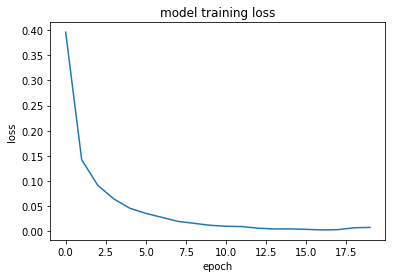

In [10]:
# Plot Loss
plt.plot(history.history['loss'])
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

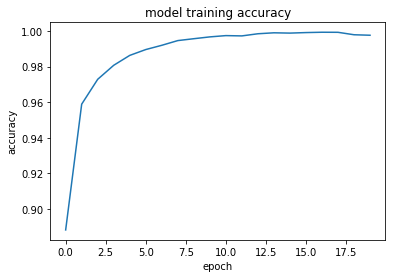

In [11]:
# Plot Loss
plt.plot(history.history['categorical_accuracy'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [12]:
y_pred = model.predict(x_test)

In [13]:
predictions = np.argmax(y_pred, axis=1)
y_pred = to_categorical(predictions)

In [14]:
print('Accuracy = %.3f' % accuracy_score(y_pred, y_test))

Accuracy = 0.982
